In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [76]:
df=pd.read_csv('train_titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [77]:
x=df.drop(columns=['Survived'])
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [78]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le

LinearRegression()

In [79]:
a=df.drop(columns=['Name','Ticket','Cabin'])
a

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [80]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
la=LabelEncoder()
la

LabelEncoder()

In [142]:
from sklearn.preprocessing import LabelEncoder

# Copy original dataset to avoid changing it directly
a = df.copy()

# Fill missing 'Embarked' values
a['Embarked'] = a['Embarked'].fillna('Unknown')

# Encode 'Sex' using LabelEncoder
la = LabelEncoder()
a['Sex'] = la.fit_transform(a['Sex'])

# Encode 'Embarked' using one-hot encoding
a = pd.get_dummies(a, columns=['Embarked'], drop_first=True).replace({True: 1, False: 0})

a.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Cluster,Embarked_Q,Embarked_S,Embarked_Unknown
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,0,1,0


In [143]:
a['Age']=df['Age'].fillna(df['Age'].median())

In [144]:
from sklearn.model_selection import train_test_split
x=a.drop(columns=['Survived'])
y=a['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [146]:
# Drop non-numeric, unneeded columns
a = a.drop(columns=['Name', 'Ticket', 'Cabin'])  # these aren't useful as-is
from sklearn.model_selection import train_test_split

x = a.drop(columns=['Survived'])  # Features
y = a['Survived']  # Target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier,plot_tree
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

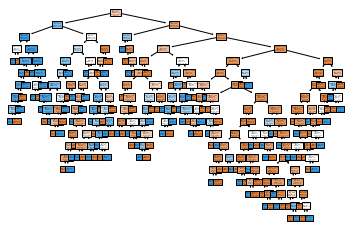

In [147]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plot_tree(model,feature_names=df.columns,class_names=["0", "1"],filled=True)
plt.show()

In [148]:
from sklearn.svm import SVC
s=SVC()
s

SVC()

In [149]:
y_pred=model.predict(x_test)

In [150]:
#regularization

model= SVC(C=1)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5977653631284916

In [151]:
#Gamma
model = SVC(gamma=10)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5865921787709497

In [155]:
#kernel
model_linear_kernal = SVC(kernel='linear')

model_linear_kernal.fit(x_train, y_train)

SVC(kernel='linear')

In [156]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=3)

In [157]:
knn.score(x_test, y_test)

0.5865921787709497

In [158]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

prec = precision_score(y_test, y_pred, average='macro')
print("Precision:", prec)

rec = recall_score(y_test, y_pred, average='macro')
print("Recall:", rec)

f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)

Confusion Matrix:
 [[81 24]
 [24 50]]
Accuracy: 0.7318435754189944
Precision: 0.7235521235521236
Recall: 0.7235521235521236
F1 Score: 0.7235521235521236


In [159]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
df_selected = df.loc[:, features].copy()
age_mean = df_selected['Age'].mean()
df_selected.loc[:, 'Age'] = df_selected['Age'].fillna(age_mean)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=features)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)
print(df['Cluster'].value_counts())
print(df[['Pclass', 'Age', 'Fare', 'Cluster']].head())


Cluster
1    542
2    239
0    110
Name: count, dtype: int64
   Pclass   Age     Fare  Cluster
0       3  22.0   7.2500        1
1       1  38.0  71.2833        2
2       3  26.0   7.9250        1
3       1  35.0  53.1000        2
4       3  35.0   8.0500        1


In [160]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']
df_model = df[features + ['Survived']].copy()
df_model['Age'].fillna(df_model['Age'].mean(), inplace=True)
df_model['Sex'] = df_model['Sex'].map({'male': 0, 'female': 1})
X = df_model[features]
y = df_model['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", round(accuracy * 100, 2), "%")


Accuracy: 77.09 %


In [161]:

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=42)


In [162]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)  # Default parameters
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [163]:
y_pred=knn.predict(X_val)
print(y_pred)

[0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0]


In [164]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_val ,y_pred)
conf

array([[113,  21],
       [ 55,  34]])

In [125]:
# Printing classification report
from sklearn.metrics import classification_report, accuracy_score
# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# calssification_report
classification = classification_report(y_val , y_pred)
print(classification)

Accuracy: 0.6592
              precision    recall  f1-score   support

           0       0.67      0.84      0.75       134
           1       0.62      0.38      0.47        89

    accuracy                           0.66       223
   macro avg       0.65      0.61      0.61       223
weighted avg       0.65      0.66      0.64       223



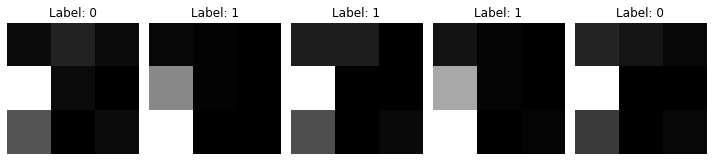

In [126]:
def plot_images(X, y, num_images=5):
    num_images = min(num_images, len(X))  
    image_size = int(X.shape[1] ** 0.5) 

    fig, axes = plt.subplots(1, num_images, figsize=(10, 3))
    if num_images == 1:
        axes = [axes]

    for i, ax in enumerate(axes):
        image = X.iloc[i].values.reshape(image_size, image_size)
        label = y.iloc[i]
        ax.imshow(image, cmap="gray")
        ax.set_title(f"Label: {label}")
        ax.axis("off")
    
    plt.tight_layout()
    plt.show()
plot_images(x, y)
